In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import time
import scipy
from PIL import Image
from scipy import ndimage

(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = mnist.load_data()
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print(Y_train_orig.shape)
print(X_train_orig.shape)

(60000,)
(60000, 28, 28)


In [3]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T  #reshapes training input data into a 784x60000 numpy array, (784 features and 60000 training examples)
Y_train_flatten = Y_train_orig.reshape(Y_train_orig.shape[0],1).T   #reshapes training output labels in 1x60000 numpy array
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T     #reshapes testing input data into a 784x10000 numpy array
Y_test_flatten = Y_test_orig.reshape(Y_test_orig.shape[0],1).T      #reshapes testing output data into a 1x10000 numpy array
print (X_train_flatten.shape)
print (Y_train_flatten.shape)
print (X_test_flatten.shape)
print (Y_test_flatten.shape)

(784, 60000)
(1, 60000)
(784, 10000)
(1, 10000)


In [4]:
X_train = X_train_flatten/255 #normalising the training and testing data
X_test = X_test_flatten/255

Y_train = np.zeros ((10,Y_train_flatten.shape[1])) #creating an empty array to map digits to vectors e.g. 3 => (0,0,0,1,0,0,0,0,0,0)
Y_test = np.zeros ((10,Y_test_flatten.shape[1]))
start = time.time()
for j in range (Y_train_flatten.shape[1]):
  number = Y_train_flatten[0,j]
  Y_train[number,j] = 1
 
for j in range (Y_test_flatten.shape[1]):
  number = Y_test_flatten[0,j]
  Y_test[number,j] = 1

end = time.time()
print (end-start)

0.03358721733093262


[5]


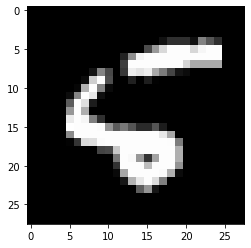

In [6]:
#displays images in the testing data set
index =8
plt.imshow(X_test[:,index].reshape(28,28))
print(Y_test_flatten[:,index])

In [7]:
def initialise_deep(layer_stucture):
  parameters = {}
  
  L=len(layer_stucture)

  for l in range (1,L):
    parameters["W" + str(l)] = np.random.randn(layer_stucture[l],layer_stucture[l-1])*0.01
    parameters["b" + str(l)] = np.zeros((layer_stucture[l],1))
  return parameters

In [8]:
structure = [784,100,64,28,10]
parameters = initialise_deep(structure)
print(parameters["b2"].shape)

(64, 1)


In [9]:
def linear_forward(A, W, b):
  Z = W@A + b       #compute linear portion of forward propogation
  cache = (A, W, b) #store values in cache for back propogation
  return Z, cache

In [10]:
def linear_activation_forward (A_prev, W , b, activation_function):
  Z, linear_cache = linear_forward(A_prev, W, b)

  if activation_function == "sigmoid":
    A = 1/(1+np.exp(-Z))

  elif activation_function == "relu":
    A = np.maximum(0,Z)
  cache = (linear_cache, Z)
  return A, cache

In [11]:
#ignore block
A1 = linear_activation_forward (X_train, parameters["W1"] , parameters["b1"], "relu")[0]
print(A1.shape)
A2 = linear_activation_forward (A1, parameters["W2"] , parameters["b2"], "relu")[0]
print(A2.shape)
A3 = linear_activation_forward (A2, parameters["W3"] , parameters["b3"], "sigmoid")[0]
print(A3[:,:4])

(100, 60000)
(64, 60000)
[[0.5000544  0.5001226  0.50001686 0.49997921]
 [0.49996236 0.49982128 0.50003056 0.50000379]
 [0.49999337 0.50012674 0.50002092 0.49992935]
 [0.49995908 0.50014391 0.49998376 0.49994573]
 [0.50001691 0.50013559 0.50003836 0.49996773]
 [0.49993181 0.4999612  0.49998015 0.50006084]
 [0.50013991 0.50000057 0.50008313 0.50010745]
 [0.50000853 0.50005716 0.49998949 0.50001335]
 [0.49995147 0.4998229  0.50001657 0.49993846]
 [0.50006008 0.49998225 0.49995328 0.49999414]
 [0.49996924 0.50002013 0.50000313 0.49997669]
 [0.5001257  0.50015618 0.50006648 0.50004281]
 [0.50007206 0.50005569 0.50002639 0.50001146]
 [0.5000273  0.5000172  0.50002167 0.50002809]
 [0.49994173 0.49988883 0.49999268 0.50001647]
 [0.50002603 0.50008802 0.49999101 0.5000426 ]
 [0.5000516  0.5000532  0.49997781 0.4999684 ]
 [0.50009281 0.50007131 0.50005043 0.5000592 ]
 [0.50008606 0.50014495 0.49997271 0.50004308]
 [0.50019727 0.50013263 0.5000844  0.50003968]
 [0.49989839 0.49995956 0.49997121 

In [12]:
def model_forward(X, parameters):
  caches = []
  L = len (parameters)//2
  A = X
  for l in range (1,L):
    A_prev = A
    A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], "relu")
    caches.append(cache)
  
  AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], "sigmoid")
  caches.append(cache)

  return AL, caches

In [14]:
AL,cahces = model_forward (X_train, parameters)
print(len(cahces))
print(AL[:,:4])

4
[[0.49999775 0.49999285 0.49999729 0.49999978]
 [0.49999765 0.4999951  0.49999949 0.4999991 ]
 [0.49999964 0.49999777 0.49999934 0.50000088]
 [0.50000575 0.50000258 0.50000304 0.50000049]
 [0.49999811 0.49999945 0.49999666 0.49999933]
 [0.49999265 0.49999664 0.49999558 0.49999569]
 [0.50000452 0.50000459 0.50000339 0.50000021]
 [0.50000266 0.50000002 0.50000143 0.50000151]
 [0.50000135 0.50000513 0.49999971 0.49999997]
 [0.49999144 0.49999271 0.49999442 0.49999626]]


In [ ]:
'''
start = time.time()
for i in range (100):
  AL,cahces = model_forward (X_train, parameters)
  if i%10==0:
    print(i)
end = time.time()
print ("Time elapsed" + str(end - start))
'''

'\nstart = time.time()\nfor i in range (100):\n  AL,cahces = model_forward (X_train, parameters)\n  if i%10==0:\n    print(i)\nend = time.time()\nprint ("Time elapsed" + str(end - start))\n'

In [15]:
def compute_cost(AL, Y):
  m = Y.shape [1]
  temp = (AL-Y)*(AL-Y)
  temp_2 = np.sum(temp, axis = 0, keepdims = True)
  cost = (1/m)*np.sum(temp_2, axis = 1)

  return cost

In [16]:
#ignore block
print (compute_cost (AL, Y_test))

ValueError: ignored

In [17]:
def linear_backwards(dZ, cache):
  A_prev, W, b = cache
  m = A_prev.shape[1]

  dW = (1/m)*dZ@A_prev.T
  db = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
  dA_prev = W.T@dZ

  return dA_prev, dW, db

In [18]:
def linear_activation_backwards(dA, cache, activation):
  linear_cache, activation_cache = cache

  if activation == "relu":
    Z = activation_cache
    dZ = np.array(dA, copy=True)
    dZ[Z<=0] = 0
    dA_prev, dW, db = linear_backwards(dZ, linear_cache)

  elif activation == "sigmoid":
    Z = activation_cache
    s = 1/(1+np.exp(-Z))
    dZ = dA*s*(1-s)
    dA_prev, dW, db = linear_backwards(dZ, linear_cache)
  
  return dA_prev, dW, db

In [20]:
def L_model_backwards(AL, Y, caches):
  grads = {}
  L = len(caches)

  dAL = 2*(AL - Y)

  current_cache = caches [L-1]
  #print(type(current_cache))
  #print("len", len(current_cache[0]))
  #print(dAL.shape)
  #print(current_cache)
  #print("dAL", type(dAL))
  #print("current_cache", type(current_cache))
  #print("sigmoid", type("sigmoid"))
  #print("function",linear_activation_backwards(dAL, current_cache, "sigmoid"))

  #grads["dA" + str (L-1)], grads["dW" + str (L)], grads["db" + str (L)] = linear_activation_backwards(dAL, current_cache, "sigmoid")
  temp1,temp2,temp3 = linear_activation_backwards(dAL, current_cache, "sigmoid")
  grads["dA" + str(L-1)] = temp1
  grads["dW" + str(L)] = temp2
  grads["db" + str(L)] = temp3
  for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backwards(grads["dA" + str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

  return grads

In [21]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
    return parameters

In [22]:
def model(X, Y, structure, parameters,new_parameters=False,learning_rate = 0.0075, num_iterations = 2000, print_cost=False):
  costs = []
  if new_parameters:
    parameters = initialise_deep(structure)
  print("num",num_iterations)
  for i in range(num_iterations):
    AL, caches = model_forward(X, parameters)
    cost = compute_cost(AL, Y)
    grads = L_model_backwards(AL, Y, caches)
    parameters = update_parameters(parameters, grads, learning_rate)
    #print(i)

    if print_cost and i%10 == 0:
      print("Cost after iteration %i: %f" %(i, cost))
    costs.append(cost)
  
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
  
    
  return parameters

In [ ]:
parameters = model(X_train, Y_train, structure, parameters , False,0.1, 300, True)

num 300
Cost after iteration 0: 0.899693
Cost after iteration 10: 0.899693
Cost after iteration 20: 0.899693
Cost after iteration 30: 0.899693
Cost after iteration 40: 0.899692
Cost after iteration 50: 0.899692
Cost after iteration 60: 0.899692
Cost after iteration 70: 0.899692
Cost after iteration 80: 0.899692
Cost after iteration 90: 0.899692
Cost after iteration 100: 0.899692
Cost after iteration 110: 0.899692
Cost after iteration 120: 0.899691
Cost after iteration 130: 0.899691
Cost after iteration 140: 0.899691
Cost after iteration 150: 0.899691
Cost after iteration 160: 0.899691
Cost after iteration 170: 0.899691
Cost after iteration 180: 0.899691
Cost after iteration 190: 0.899691
Cost after iteration 200: 0.899690
Cost after iteration 210: 0.899690
Cost after iteration 220: 0.899690
Cost after iteration 230: 0.899690
Cost after iteration 240: 0.899690
Cost after iteration 250: 0.899690
Cost after iteration 260: 0.899690
Cost after iteration 270: 0.899689
Cost after iteration 28

In [24]:
def predict(X, parameters):
  AL = model_forward(X, parameters)[0]
  predictions = np.zeros((1,AL.shape[1]),dtype=int)
  for j in range(AL.shape[1]):
    predictions[0,j] = np.where(AL[:,j]==np.amax(AL[:,j]))[0][0]
  return AL, predictions[0]


In [ ]:
#ignore
saved_parameters=parameters

In [25]:
AL, predictions = predict(X_test,parameters)


In [26]:
print(compute_cost(AL, Y_test))

[0.05801241]


In [ ]:
print(predictions,Y_test_orig)
print(type(int(predictions[0])))
print(predictions[2])

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]
<class 'int'>
1


In [27]:
count = 0
index_of_errors = []
for j in range(len(predictions)):
  if int(predictions[j]) != int(Y_test_orig[j]):
    count += 1
    index_of_errors.append(j)
print (count)
print(index_of_errors)

361
[8, 104, 149, 151, 241, 247, 259, 266, 274, 321, 324, 381, 445, 447, 448, 449, 479, 543, 551, 582, 583, 610, 646, 658, 691, 707, 717, 720, 740, 786, 844, 924, 950, 951, 956, 959, 965, 1003, 1014, 1032, 1039, 1050, 1055, 1107, 1112, 1131, 1178, 1181, 1182, 1224, 1226, 1228, 1232, 1242, 1247, 1253, 1260, 1283, 1289, 1326, 1328, 1413, 1414, 1415, 1444, 1494, 1522, 1527, 1530, 1549, 1551, 1553, 1559, 1609, 1634, 1681, 1709, 1717, 1721, 1732, 1751, 1754, 1772, 1790, 1808, 1850, 1868, 1901, 1940, 1952, 1982, 2016, 2018, 2024, 2040, 2044, 2070, 2098, 2109, 2118, 2125, 2129, 2130, 2135, 2182, 2186, 2237, 2266, 2272, 2291, 2292, 2293, 2299, 2325, 2369, 2371, 2380, 2387, 2433, 2454, 2488, 2560, 2573, 2582, 2589, 2597, 2607, 2631, 2648, 2654, 2695, 2720, 2730, 2743, 2771, 2850, 2877, 2919, 2921, 2927, 2939, 2945, 2953, 2995, 3001, 3030, 3033, 3060, 3073, 3117, 3130, 3132, 3145, 3189, 3218, 3240, 3330, 3337, 3384, 3475, 3490, 3503, 3520, 3550, 3558, 3559, 3567, 3573, 3574, 3575, 3597, 3681, 37

[9]
8


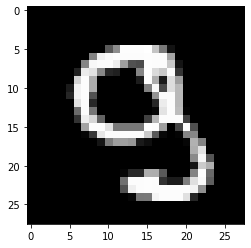

In [ ]:
index =151
plt.imshow(X_test[:,index].reshape(28,28))
print(Y_test_flatten[:,index])
print(predictions[index])

In [ ]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

NameError: ignored

In [ ]:
print(len(parameters))

8


In [ ]:
import pickle
outfile = open ("/content/drive/MyDrive/params_100_64_28",'wb')

In [ ]:
#this will overwrite saved parameters
pickle.dump(parameters,outfile)
outfile.close()

In [23]:
#imports pretrained model
import pickle
infile = open ("/content/drive/MyDrive/Colab Notebooks/digit_classifier/params_100_64_28",'rb')
parameters = pickle.load(infile)
infile.close

<function BufferedReader.close>

[5]


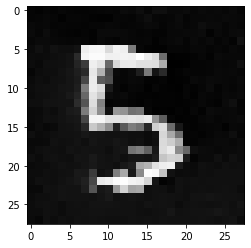

In [ ]:
import imageio
import scipy.misc
import cv2
my_image = "/content/drive/MyDrive/Colab Notebooks/digit_classifier/test_5_inv.jpg" 
my_label_y = [1] 


image = np.array(Image.open(my_image).convert("L"))
#image = np.array(imageio.imread(my_image).convert("LA"))
#image = image.convert("LA")
my_image_1 = cv2.resize(image,(28,28))
my_image_2 = my_image_1.reshape((28*28,1))
my_image = my_image_2/255
my_predicted_image = predict(my_image, parameters)[1]


plt.imshow(my_image_1)
#print ("y = " + str(my_predicted_image))
print(my_predicted_image)